In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn import tree
from sklearn.svm import SVC

In [2]:
# prepare data
csvFile = pd.read_csv('../Datasets/Dataset2.csv')
colNames = list(csvFile.columns)

# column names without target
colNamesX = colNames.copy()
colNamesX.remove('Y')

# get the data as numpy array
dfX = csvFile[colNamesX]
X = dfX.values
Y = csvFile['Y'].values

# Randomize the data because it could be sorted.
numsMe = np.random.permutation(csvFile.shape[0])

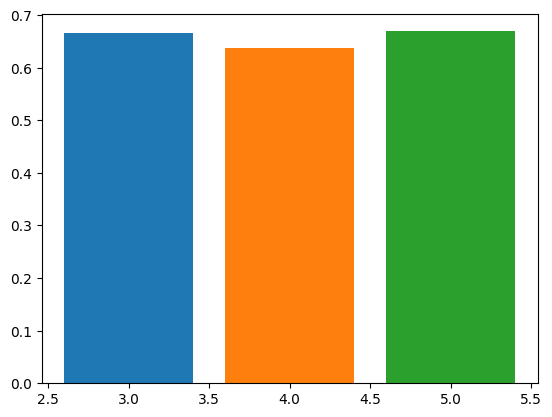

In [7]:
# cross validation for 3,4,5
for curr in range(3, 6):
    num_folds = curr
    score = 0
    # implement cross validation
    # https://de.mathworks.com/discovery/cross-validation.html
    for i in range(0, num_folds):
        partition_size = int(np.floor(csvFile.shape[0] / num_folds))
        left_border = partition_size * i
        right_border = partition_size * (i + 1)
        testInds = numsMe[left_border:right_border]
        trainInds = np.concatenate((numsMe[0:left_border], numsMe[right_border:csvFile.shape[0]]))

        TrainX, TestX = X[trainInds], X[testInds]
        TrainY, TestY = Y[trainInds], Y[testInds]

        clf_dt = tree.DecisionTreeClassifier()
        clf_dt = clf_dt.fit(TrainX, TrainY)

        predY_dt = clf_dt.predict(TestX)

        score = score + accuracy_score(TestY, predY_dt)
    plt.bar(num_folds, score / num_folds)
plt.show()

In [4]:
# one hot encoding
Y_Arr = np.zeros((Y.shape[0], 4))
for i in range(Y.shape[0]):
    if Y[i] == 0:
        Y_Arr[i] = [1, 0, 0, 0]
    if Y[i] == 1:
        Y_Arr[i] = [0, 1, 0, 0]
    elif Y[i] == 2:
        Y_Arr[i] = [0, 0, 1, 0]
    elif Y[i] == 3:
        Y_Arr[i] = [0, 0, 0, 1]

_thresh = int(np.floor(csvFile.shape[0] * .8))

print("Threshold:", _thresh)
trainInds = numsMe[:_thresh]
testInds = numsMe[_thresh:]

TrainX, TestX = X[trainInds], X[testInds]
TrainY, TestY = Y_Arr[trainInds, :], Y_Arr[testInds, :]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(TrainX, TrainY)

preds = clf.predict(TestX)

correct_preds = 0
for index, i in enumerate(preds):
    if np.array_equal(i, TestY[index]):
        correct_preds = correct_preds + 1
accuracy = correct_preds / len(TestY)
print("Accuracy=" + str(accuracy))

Threshold: 511
Accuracy=0.65625


In [ ]:
# dummy encoding (like one hot but without the first column)
Y_Arr = np.zeros((Y.shape[0], 3))
for i in range(Y.shape[0]):
    if Y[i] == 0:
        Y_Arr[i] = [0, 0, 0]
    if Y[i] == 1:
        Y_Arr[i] = [1, 0, 0]
    elif Y[i] == 2:
        Y_Arr[i] = [0, 1, 0]
    elif Y[i] == 3:
        Y_Arr[i] = [0, 0, 1]